In [ ]:
import numpy as np
from tensorflow.keras.datasets import imdb
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import joblib

# Load the IMDB dataset with a vocabulary size of 10,000
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Convert the word indices to text
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = {v: k for k, v in word_index.items()}
x_train = [" ".join([reverse_word_index.get(i - 3, "<UNK>") for i in s]) for s in x_train]
x_test = [" ".join([reverse_word_index.get(i - 3, "<UNK>") for i in s]) for s in x_test]

# Pre-process the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=vocab_size)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Train a support vector machine (SVM) on the TF-IDF matrices
svm = SVC()
svm.fit(x_train_tfidf, y_train)

# Evaluate the SVM model on the TF-IDF matrices
train_acc = svm.score(x_train_tfidf, y_train)
test_acc = svm.score(x_test_tfidf, y_test)

print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")



1641221/1641221 [==============================] - 0s 0us/step
Train accuracy: 0.98208
Test accuracy: 0.8854


In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)

# Guardar el vectorizador en un archivo
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [ ]:

# Guardar el modelo en un archivo
joblib.dump(svm, 'modelo_svm.pkl')
#svm.save("modelo3.h5")

['modelo_svm.pkl']

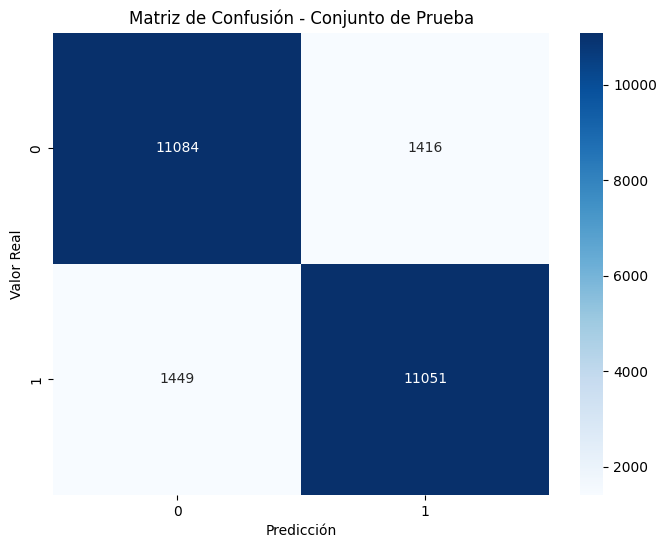

AttributeError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Obtener las predicciones del modelo SVM en el conjunto de entrenamiento y prueba
train_predictions = svm.predict(x_train_tfidf)
test_predictions = svm.predict(x_test_tfidf)

# Crear la matriz de confusión para el conjunto de entrenamiento
train_cm = confusion_matrix(y_train, train_predictions)

# Crear la matriz de confusión para el conjunto de prueba
test_cm = confusion_matrix(y_test, test_predictions)

# Graficar la matriz de confusión para el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()



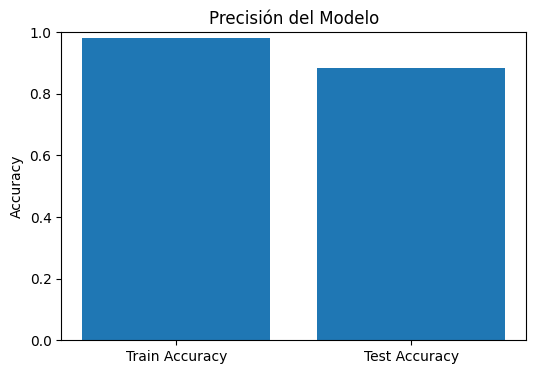

In [ ]:
# Graficar las curvas de precisión
labels = ["Train Accuracy", "Test Accuracy"]
accuracy = [train_acc, test_acc]

plt.figure(figsize=(6, 4))
plt.bar(labels, accuracy)
plt.title("Precisión del Modelo")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [ ]:
# Load the trained SVM model
svm = joblib.load("modelo_svm.pkl")

# Prompt the user to enter a review for classification
user_review = input("Enter a review for classification: ")

# Pre-process the user's review using TF-IDF vectorizer
user_tfidf = vectorizer.transform([user_review])

# Use the trained SVM model to predict the sentiment of the user's review
prediction = svm.predict(user_tfidf)

# Print the predicted sentiment
if prediction == 1:
    print("Positive review!")
    
else:
    print("Negative review!")

Enter a review for classification: nice movie
Positive review!


In [ ]:
# Cargar el modelo desde el archivo
modelo_cargado = joblib.load('modelo_svm.pkl')

# Hacer predicciones utilizando el modelo cargado
predicciones = modelo_cargado.predict(x_test_tfidf)
